<a href="https://colab.research.google.com/github/arnaldomariano/Facial_Emotion_Detection/blob/main/Google_Digit_Recognition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**


--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, BatchNormalization, MaxPooling2D

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.layers import GlobalAveragePooling2D




**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
import h5py
import os

h5f = h5py.File('/content/drive/MyDrive/Elective_project/SVHN_single_grey1.h5', 'r')

# Load the training and the test dataset

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()


Let's check the number of images in the training and the testing dataset.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

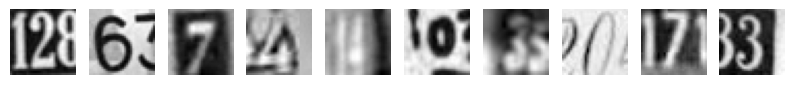

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [7]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data.**

In [9]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train/255

X_test = X_test/255

In [10]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [11]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

In [12]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [13]:

# Define the model architecture
def nn_model_1():

    model = Sequential()

    # First hidden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu', input_shape=(1024,)))

    # Second hidden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))

    # Output layer with activation as 'softmax' and number of nodes equal to the number of classes (10)
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model


In [14]:
# Build the model (# Call the nn_model_1 function and store the model in a new variable)

model_1 = nn_model_1()

In [15]:
# Print the summary

model_1.summary()

model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
#Fit the model

# Fit the model on the train data
history_model_1 = model_1.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    verbose=1
)

Epoch 1/20
263/263 [==============================] - 3s 5ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3593 - accuracy: 0.5566 - val_loss: 1.3259 - val_accuracy: 0.5749
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.2905 - accuracy: 0.5834 - val_loss: 1.2542 - val_accuracy: 0.6012
Epoch 

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

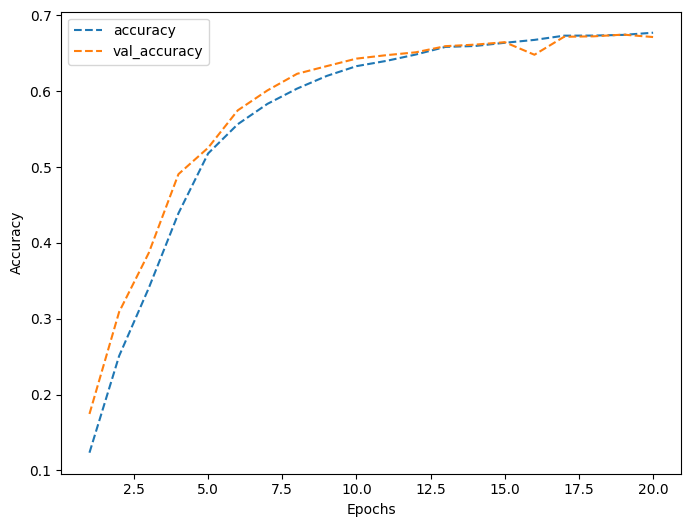

In [17]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 6))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations**: This is our first model architeture training. Despite the validation curve being slightly above the accuracy curve, we achieved a good overall results. Uppon the the epoch plot, we can see that with the training it was possible to significantly reduce losses and greatly improve the accuracy validation values. But we can work more in order to improve the results that has been achived around 60% success.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [18]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [19]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture.**

In [20]:
# Define the model

def nn_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    #First hiden layer with 256 nodes and relu activation
    model.add(Dense(256, activation='relu', input_shape=(1024,)))

     #Second hiden layer with 128 nodes and relu activation
    model.add(Dense(128, activation='relu'))

    #Add the **Dropout layer with the rate equal to 0.2**
    Dropout(0.2),

     #Third hiden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))

    #Fourth hiden layer with 64 nodes and relu activation
    model.add(Dense(64, activation='relu'))

    #Fifth hiden layer with 32 nodes and relu activation
    model.add(Dense(32, activation='relu'))

    #Output layer with activation as 'softmax
    model.add(Dense(10, activation='softmax'))

    #Compile the model

    model.compile(
      loss= 'categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
      metrics=['accuracy']
    )

    return model

In [21]:
# Build the model

model_2 = nn_model_2()

In [22]:
# Print the model summary
model_2.summary()

model: 'sequential'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 310122 (1.18 MB)
Trainable params: 310122 

In [23]:
# Fit the model

history_model_2 = model_2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=30,
    verbose=1

)

Epoch 1/30
263/263 [==============================] - 3s 5ms/step - loss: 2.2643 - accuracy: 0.1306 - val_loss: 2.1431 - val_accuracy: 0.1783
Epoch 2/30
263/263 [==============================] - 1s 4ms/step - loss: 1.8517 - accuracy: 0.3160 - val_loss: 1.6585 - val_accuracy: 0.4049
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 1.6144 - accuracy: 0.4265 - val_loss: 1.5275 - val_accuracy: 0.4615
Epoch 4/30
263/263 [==============================] - 2s 7ms/step - loss: 1.5203 - accuracy: 0.4738 - val_loss: 1.4443 - val_accuracy: 0.5157
Epoch 5/30
263/263 [==============================] - 2s 7ms/step - loss: 1.3842 - accuracy: 0.5404 - val_loss: 1.3368 - val_accuracy: 0.5595
Epoch 6/30
263/263 [==============================] - 1s 5ms/step - loss: 1.2823 - accuracy: 0.5788 - val_loss: 1.2461 - val_accuracy: 0.5919
Epoch 7/30
263/263 [==============================] - 1s 4ms/step - loss: 1.2192 - accuracy: 0.6024 - val_loss: 1.1933 - val_accuracy: 0.6199
Epoch 

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

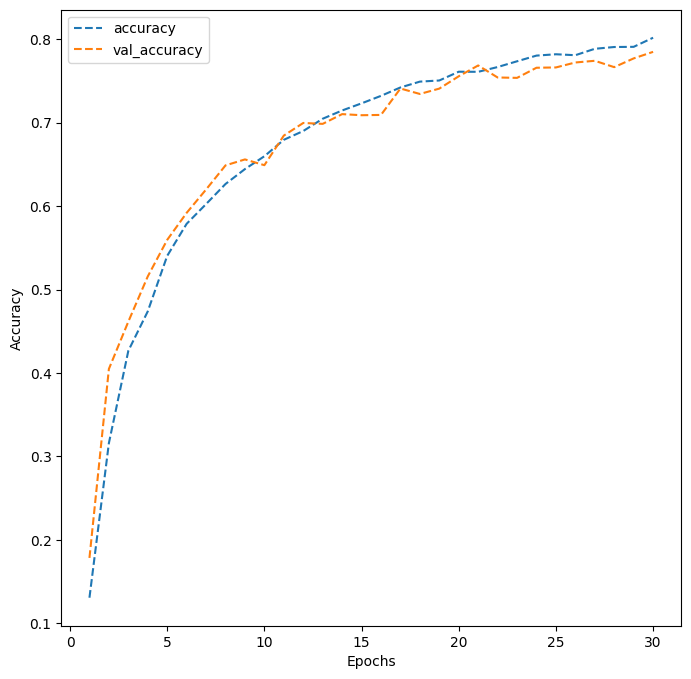

In [24]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:** Although we increased the number of layers, we noticed that in this second model, we increased distortions and noise, as we can see in this image. (although we are still close to what is desired) This happens as a result of the consequent increase we made in the learning rate from 0.0001 to 0.0005. Let's try to make it better!

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [25]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [26]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1814
           1       0.80      0.82      0.81      1828
           2       0.78      0.81      0.79      1803
           3       0.72      0.75      0.73      1719
           4       0.85      0.81      0.83      1812
           5       0.71      0.78      0.74      1768
           6       0.81      0.76      0.78      1832
           7       0.87      0.77      0.82      1808
           8       0.68      0.77      0.72      1812
           9       0.75      0.78      0.77      1804

    accuracy                           0.78     18000
   macro avg       0.79      0.78      0.78     18000
weighted avg       0.79      0.78      0.78     18000



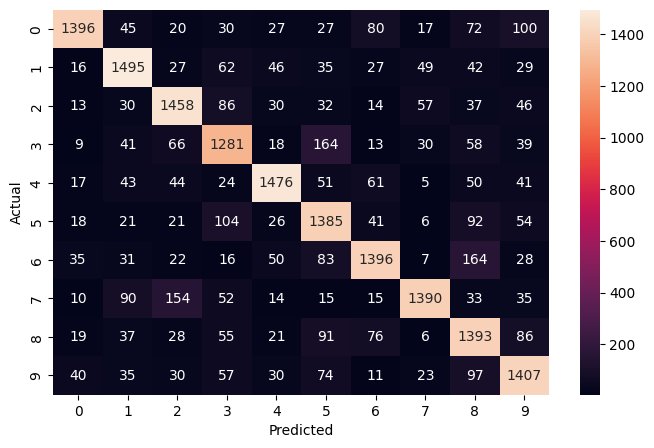

In [27]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

#Write the code for creating confusion matrix using actual labels (y_test) and predicted labels (test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**The model appears to have a solid performance, as the precision rates for recognizing positive instances are around 0.78. These values indicate a good positive instance identification rate for all classes. On the other hand, recall rates also present rates around 0.78, which indicates a good capacity to recover positive instances for all classes.


## **Using Convolutional Neural Networks**

In [28]:
h5f = h5py.File('/content/drive/MyDrive/Elective_project/SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]


# Close this file

h5f.close()

Let's check the number of images in the training and the testing dataset.

In [29]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [30]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [31]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [32]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

In [33]:
# New shape

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [34]:
# Write the function and appropriate variable name to one-hot encode the output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [35]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [36]:
# Define the model

def cnn_model_1():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(32, 32, 1)))

    model.add(LeakyReLU(0.1))

    #Second CNN

    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size= (2, 2)))

    model.add(Flatten())

    model.add(Dense(32))

    model.add(LeakyReLU(0.1))

    #Final_ output layer

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model

    model.compile(
      loss= 'categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      metrics=['accuracy']
    )

    return model

In [37]:
# Build the model

model_1 = cnn_model_1()

In [38]:
# Print the model summary

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [39]:
# Fit the model

history_cnn_model_1 = model_1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    shuffle = True,
    batch_size=32,
    epochs=20,
    verbose=1
)

Epoch 1/20
1050/1050 [==============================] - 9s 6ms/step - loss: 1.1143 - accuracy: 0.6372 - val_loss: 0.6616 - val_accuracy: 0.8092
Epoch 2/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.5536 - accuracy: 0.8399 - val_loss: 0.5256 - val_accuracy: 0.8499
Epoch 3/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.4524 - accuracy: 0.8668 - val_loss: 0.5140 - val_accuracy: 0.8526
Epoch 4/20
1050/1050 [==============================] - 5s 5ms/step - loss: 0.3876 - accuracy: 0.8862 - val_loss: 0.4496 - val_accuracy: 0.8755
Epoch 5/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3423 - accuracy: 0.8957 - val_loss: 0.4503 - val_accuracy: 0.8710
Epoch 6/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3026 - accuracy: 0.9093 - val_loss: 0.4785 - val_accuracy: 0.8649
Epoch 7/20
1050/1050 [==============================] - 6s 5ms/step - loss: 0.2728 - accuracy: 0.9172 - val_loss: 0.4475 - val_accuracy:

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot.**

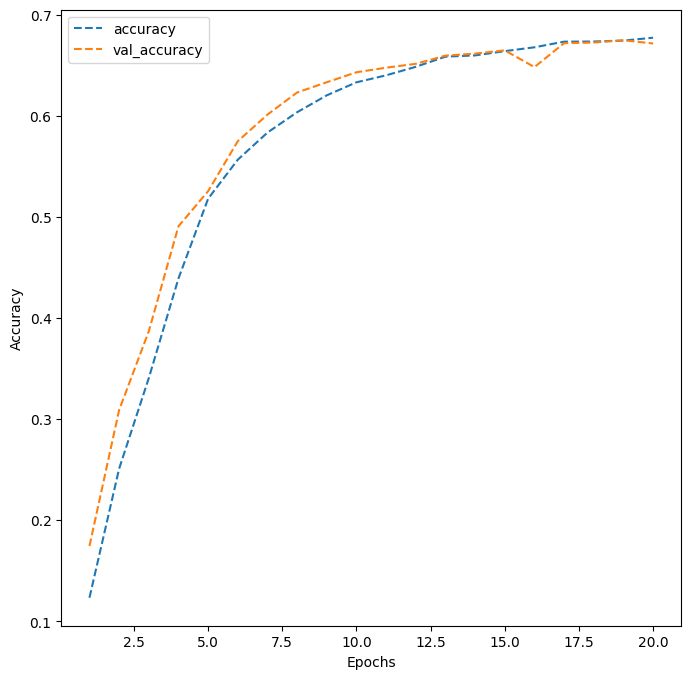

In [40]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:** In this new model, we can see that the accuracy is around 98%, which demonstrates that the model is adjusting well and is able to learn. However, it may also indicate that there is a tendency towards overfitting. But so that we could confirm this hypothesis, it might be interesting to increase the number of epochs. But that is not the proposal at the moment.

The validation loss is also decreasing, indicating that the model is generalizing well to unseen data.

The difference between the training and validation metrics is not very large, which may suggest that the model may not be suffering from overfitting. But we need to remain attentive to the next models for the issue of overfitting.

Overall, these results seem quite satisfactory.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [41]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [42]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [43]:
# Define the model


def cnn_model_2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    # First convolution layer
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(32, 32, 1)))

    model.add(LeakyReLU(0.1))

    # Second convolution layer
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size= (2, 2)))

    model.add(Dense(32, activation = 'relu'))

    # Third convolution layer
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same"))

    model.add(LeakyReLU(0.1))

    #model.add(MaxPooling2D(pool_size= (2, 2)))

    # Fourth convolution layer
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same"))

    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size= (2, 2)))

    #Add a BatchNormalization layer

    model.add(Dense(32, activation = 'relu'))

    model.add(Flatten())

    model.add(Dense(32, activation='relu'))

    model.add(LeakyReLU(0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'softmax'))

    # Compile the model

    model.compile(
      loss= 'categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      metrics=['accuracy']
    )

    return model


In [44]:
# Build the model

model_2 = cnn_model_2

In [45]:
# Crie a instância do modelo
model_2 = cnn_model_2()


In [46]:
# Print the summary

# Imprima o resumo do modelo
model_2.summary()

model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dense (Dense)               (None, 16, 16, 32)        1056      
                                                        

In [47]:
# Fit the model

history_cnn_model_2 = model_2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=30,
    verbose=1
)

Epoch 1/30
263/263 [==============================] - 8s 14ms/step - loss: 2.1655 - accuracy: 0.1735 - val_loss: 1.1944 - val_accuracy: 0.6620
Epoch 2/30
263/263 [==============================] - 3s 12ms/step - loss: 1.2197 - accuracy: 0.5688 - val_loss: 0.6133 - val_accuracy: 0.8207
Epoch 3/30
263/263 [==============================] - 3s 12ms/step - loss: 0.9439 - accuracy: 0.6778 - val_loss: 0.5154 - val_accuracy: 0.8512
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.8397 - accuracy: 0.7100 - val_loss: 0.4887 - val_accuracy: 0.8567
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 0.7618 - accuracy: 0.7409 - val_loss: 0.4422 - val_accuracy: 0.8698
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 0.7188 - accuracy: 0.7556 - val_loss: 0.4497 - val_accuracy: 0.8688
Epoch 7/30
263/263 [==============================] - 3s 13ms/step - loss: 0.6697 - accuracy: 0.7740 - val_loss: 0.4199 - val_accuracy: 0.8750

### **Plotting the validation and training accuracies**

### **Write your observations on the below plot**

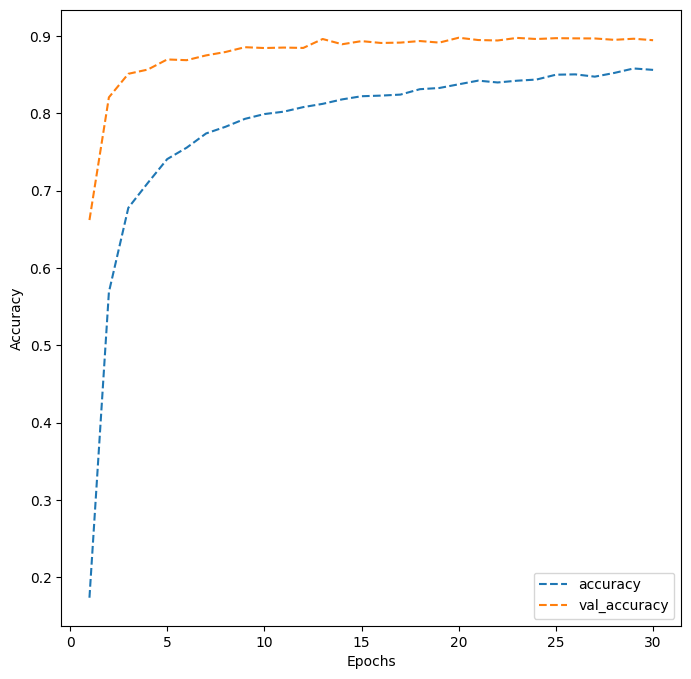

In [48]:
# Plotting the accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**In this most recent training, we realized that the model managed to undergo an evolution with the changes promoted in the architecture. We can see that the sample validation achieved a digit recognition rate of around 90%. Index considered quite satisfactory, indicating a good adaptation of the model to the training data.
The validation and training curves appear stable and without major fluctuations.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [49]:
# Make predictions on the test data using model_2
test_pred = model_2.predict(X_test)

# Convert predictions to labels
test_pred = np.argmax(test_pred, axis=-1)

# Convert y_test to labels
y_test = np.argmax(y_test, axis=-1)


563/563 [==============================] - 3s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1814
           1       0.90      0.89      0.89      1828
           2       0.94      0.91      0.92      1803
           3       0.87      0.86      0.87      1719
           4       0.89      0.92      0.91      1812
           5       0.86      0.92      0.89      1768
           6       0.88      0.90      0.89      1832
           7       0.94      0.90      0.92      1808
           8       0.89      0.87      0.88      1812
           9       0.90      0.88      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



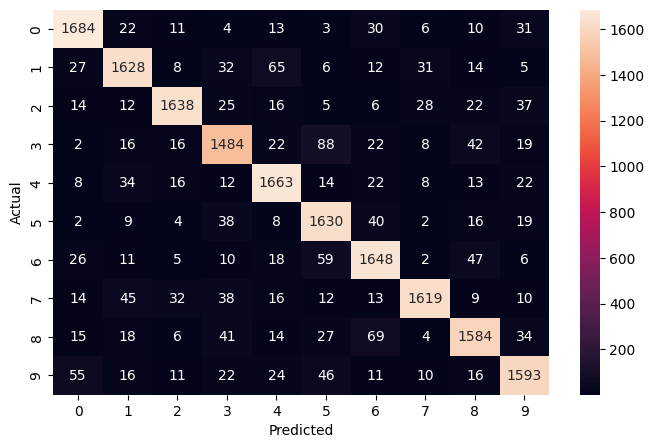

In [50]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:** Finally, we can see that the model demonstrates to be effective and generalized learning of unseen images. The accuracy achieved is satisfactory and indicates that the model is capturing important patterns in the data.

Although there are possibilities for improvements, we consider the results to be satisfactory for the moment.